CODE BLOCK: 1

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {"image_size":(28,28),"center_crop_size":22,
                         "center_crop_probability":0.1,
                         "random_rotation_angle":(-15., 15.),
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,)
                         }

dataloader_kwargs = {'batch_size': 1024, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


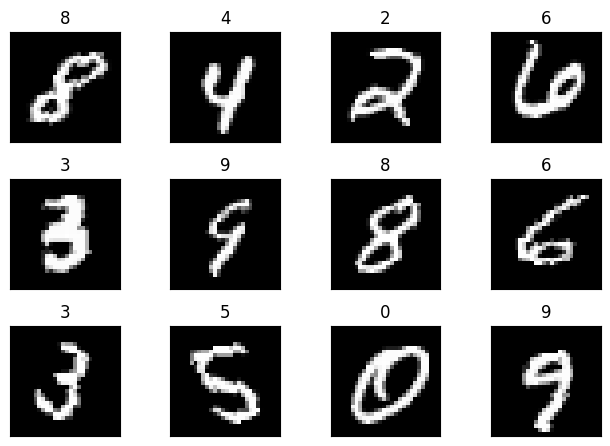

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------


In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "step_size":2,
                       "gamma":0.1,
                       "num_epochs":5
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.2604 Batch_id=58 Accuracy=31.70: 100%|██████████| 59/59 [00:26<00:00,  2.23it/s]
INFO:utils:Test set: Average loss: 0.0023, Accuracy: 3098/10000 (30.98%)



Test set: Average loss: 0.0023, Accuracy: 3098/10000 (30.98%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.4902 Batch_id=58 Accuracy=56.93: 100%|██████████| 59/59 [00:23<00:00,  2.47it/s]
INFO:utils:Test set: Average loss: 0.0004, Accuracy: 8904/10000 (89.04%)



Test set: Average loss: 0.0004, Accuracy: 8904/10000 (89.04%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 3


Train: Loss=0.3791 Batch_id=58 Accuracy=87.37: 100%|██████████| 59/59 [00:23<00:00,  2.48it/s]
INFO:utils:Test set: Average loss: 0.0003, Accuracy: 9120/10000 (91.20%)



Test set: Average loss: 0.0003, Accuracy: 9120/10000 (91.20%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 4


Train: Loss=0.3392 Batch_id=58 Accuracy=88.81: 100%|██████████| 59/59 [00:23<00:00,  2.48it/s]
INFO:utils:Test set: Average loss: 0.0003, Accuracy: 9235/10000 (92.35%)



Test set: Average loss: 0.0003, Accuracy: 9235/10000 (92.35%)

Adjusting learning rate of group 0 to 1.0000e-04.
Epoch 5


Train: Loss=0.4122 Batch_id=58 Accuracy=89.46: 100%|██████████| 59/59 [00:23<00:00,  2.49it/s]
INFO:utils:Test set: Average loss: 0.0003, Accuracy: 9234/10000 (92.34%)



Test set: Average loss: 0.0003, Accuracy: 9234/10000 (92.34%)

Adjusting learning rate of group 0 to 1.0000e-04.


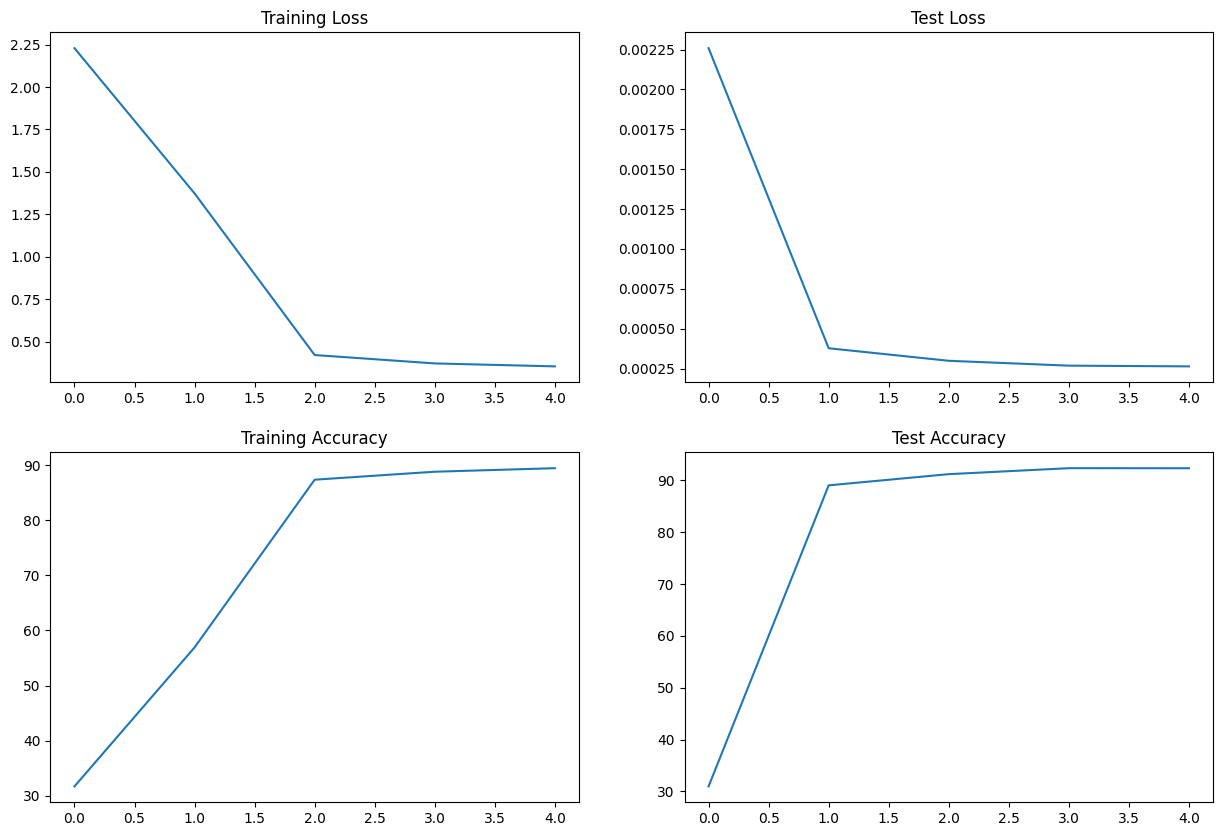

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

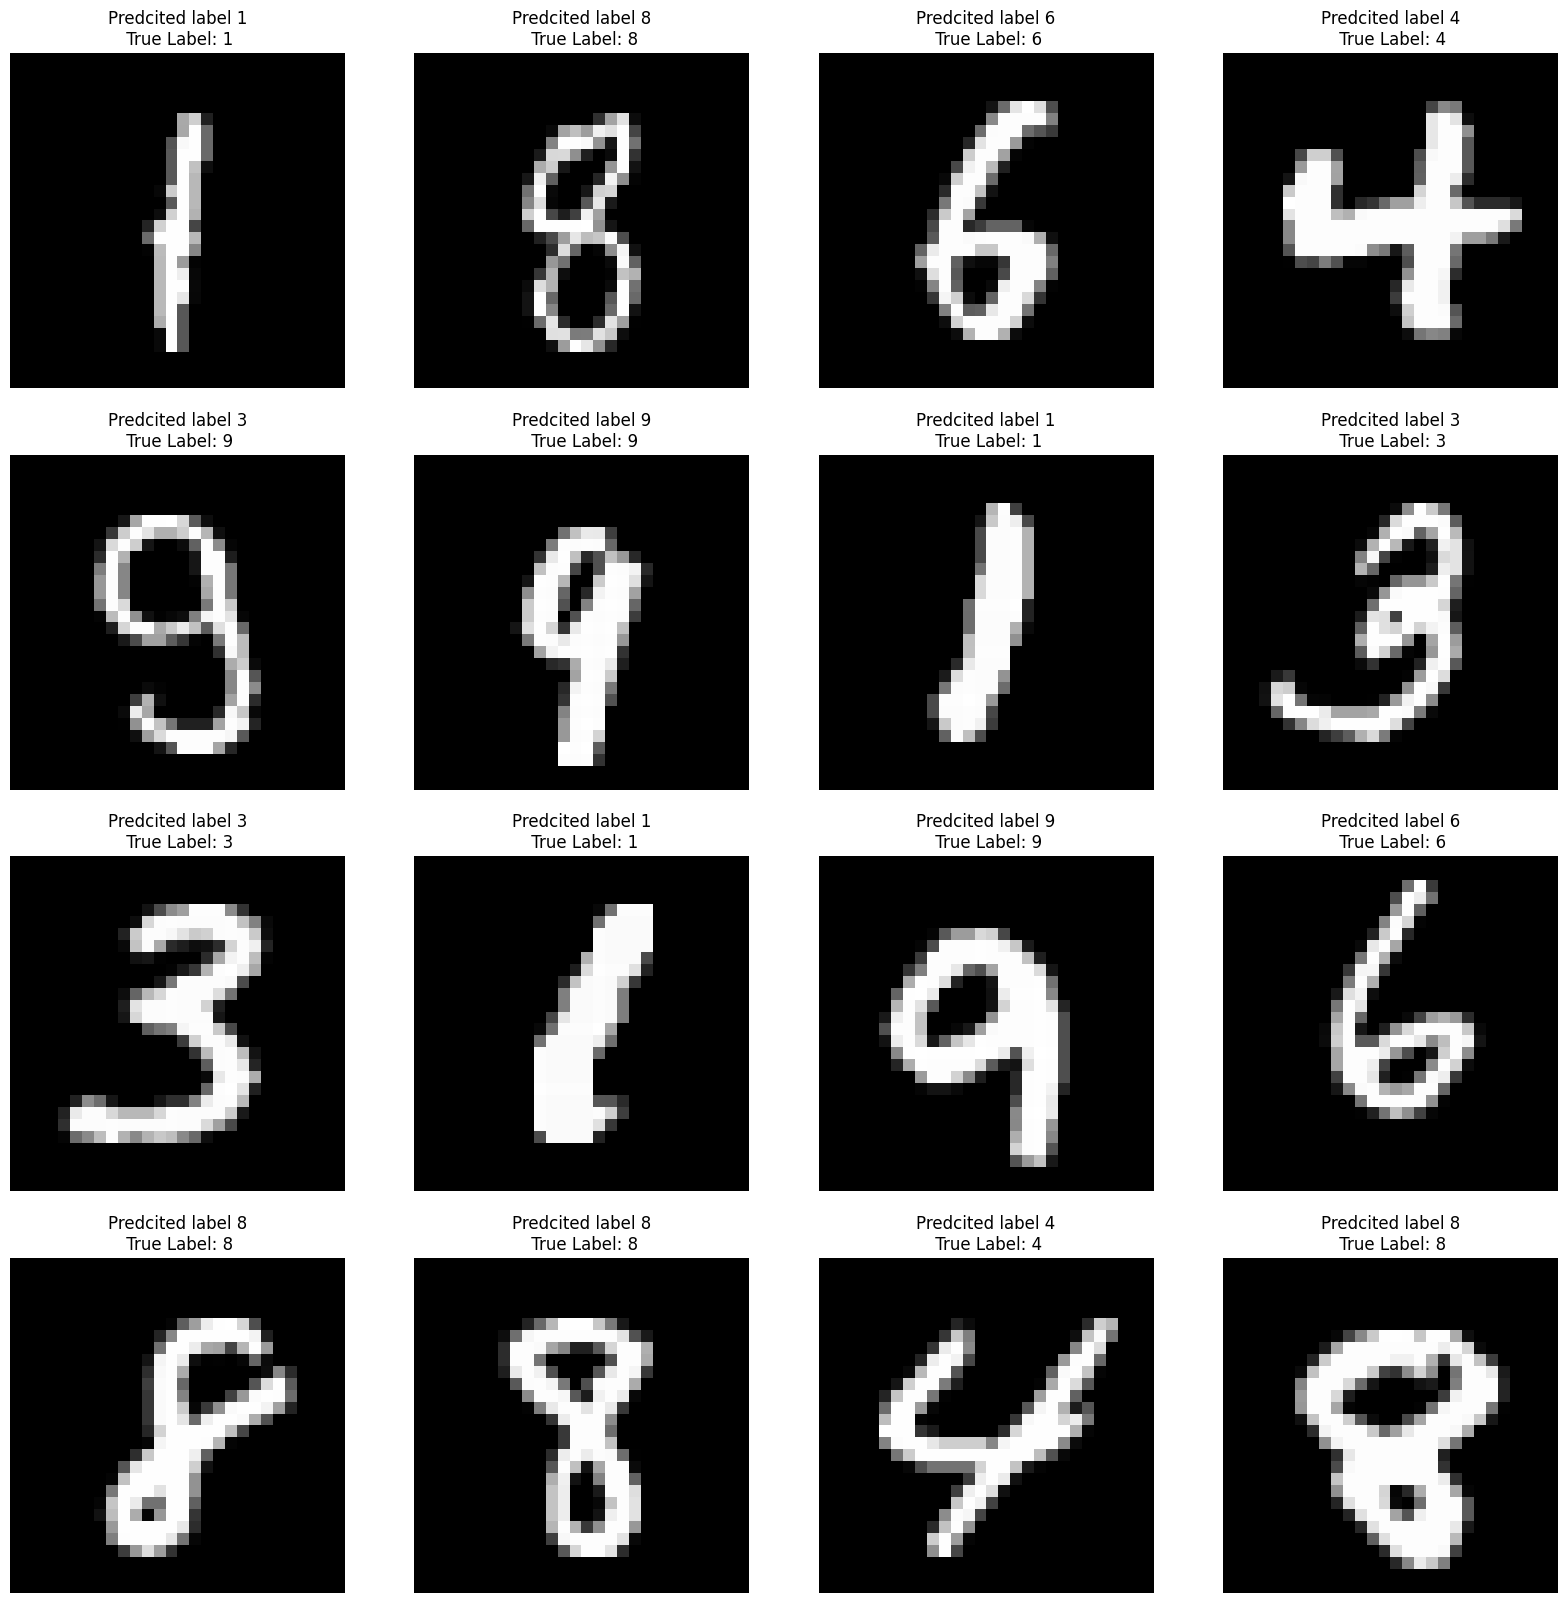

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

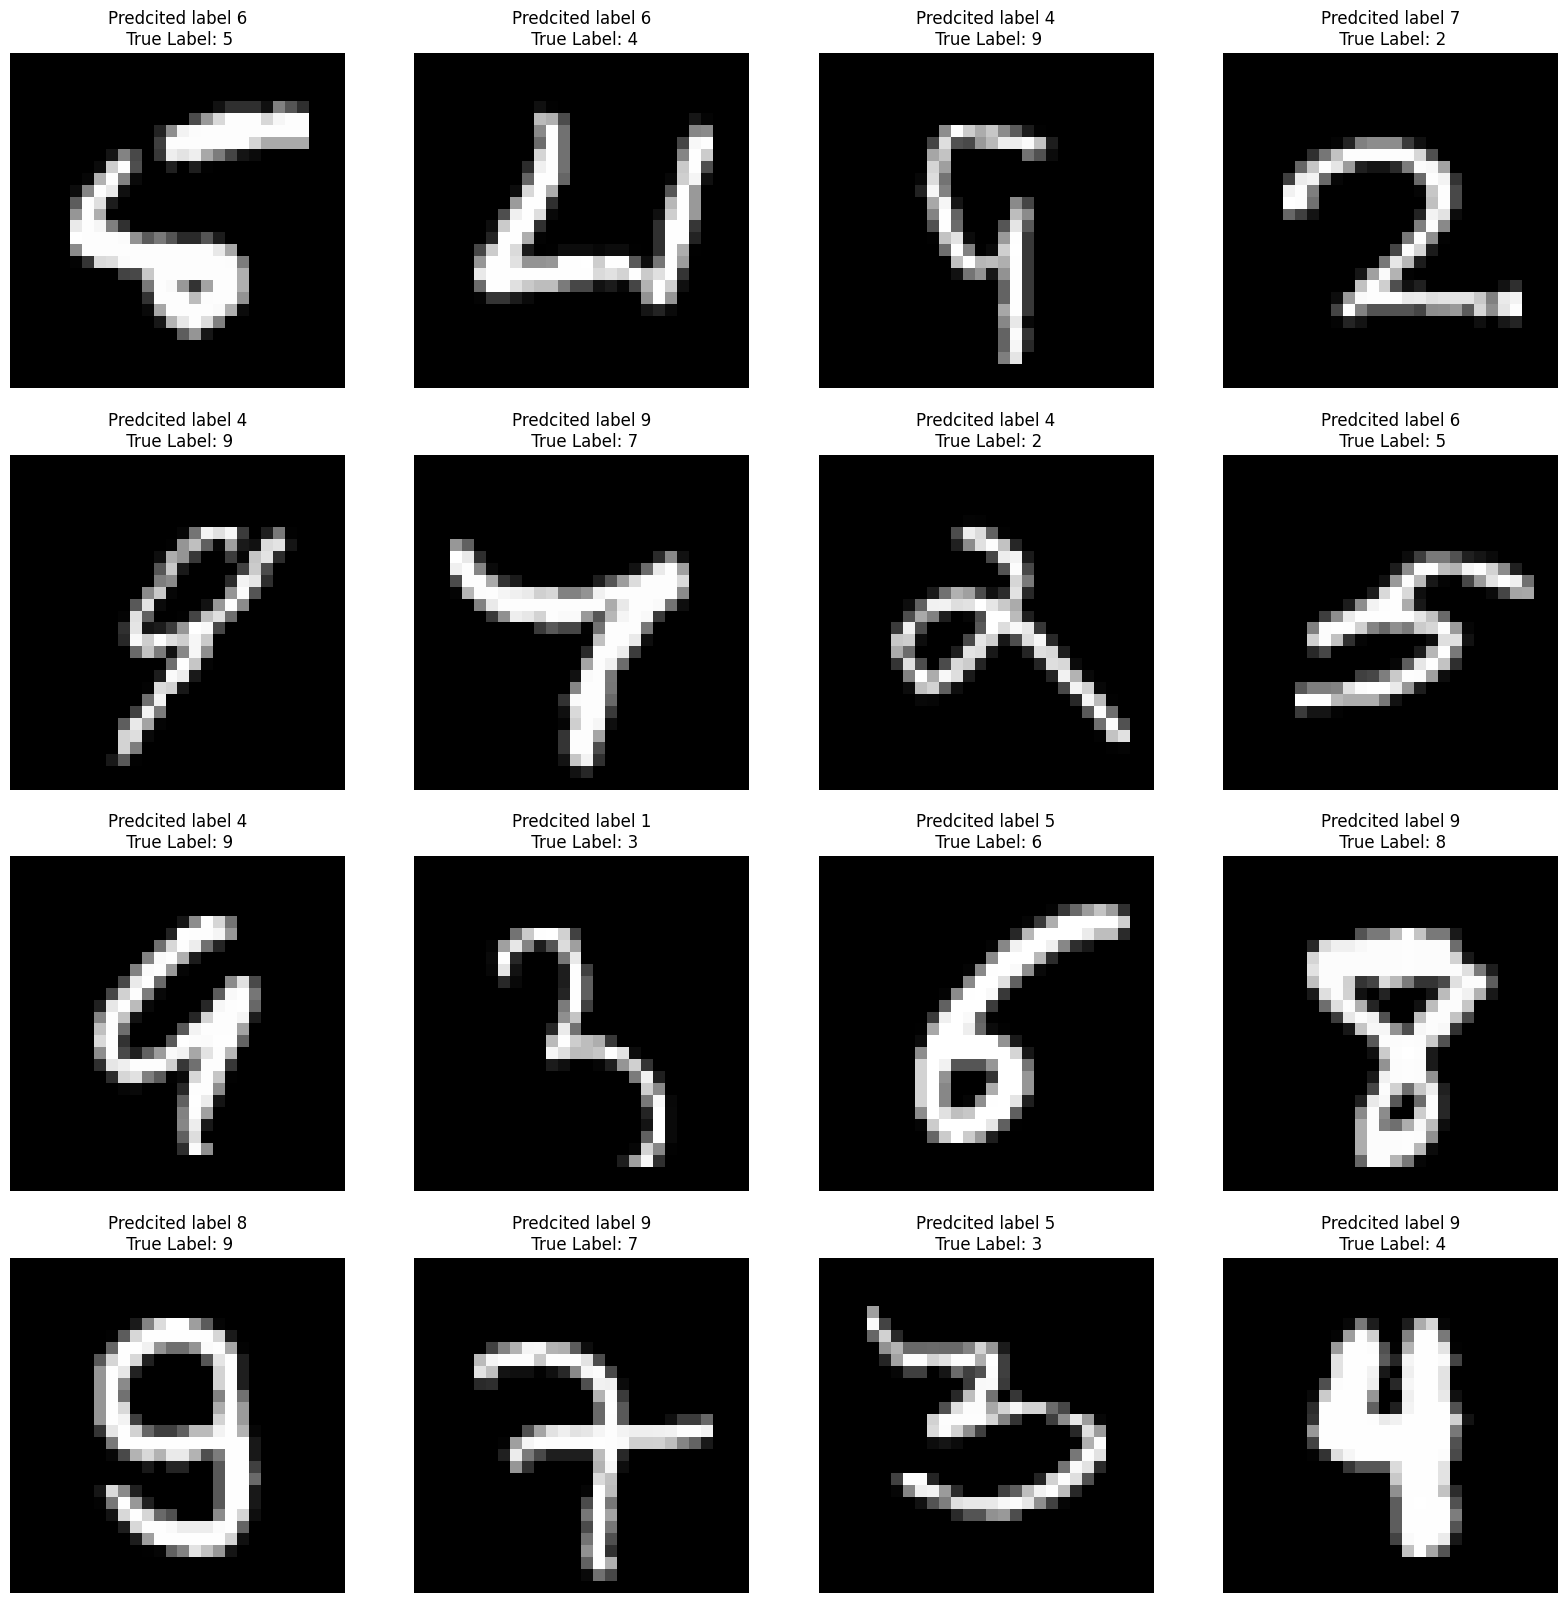

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 100 %
Accuracy of 1 - one : 88 %
Accuracy of 2 - two : 84 %
Accuracy of 3 - three : 80 %
Accuracy of 4 - four : 100 %
Accuracy of 5 - five : 100 %
Accuracy of 6 - six : 81 %
Accuracy of 7 - seven : 90 %
Accuracy of 8 - eight : 100 %
Accuracy of 9 - nine : 85 %


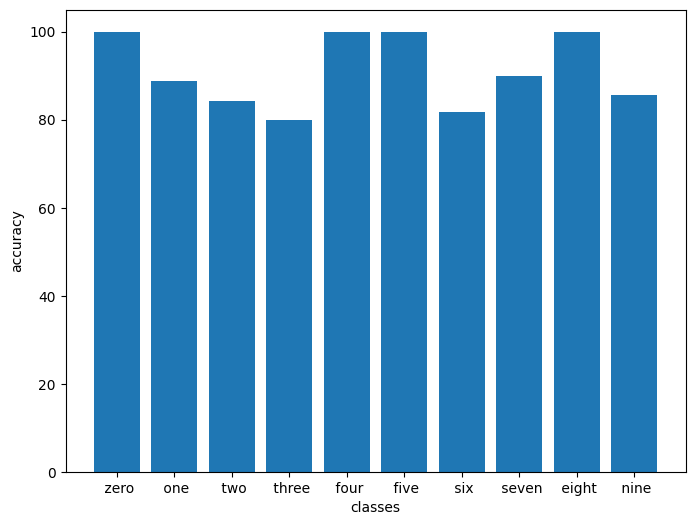

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)